# Fundamentos de Inteligência Artificial
## Projeto II
### Marcello Fabrizio

In [83]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

import warnings
warnings.filterwarnings('ignore')

Este projeto tem como objetivo realizar a comparação dos algoritmos de classificação estudados, sendo eles Decision Tree, K-Nearest Neighbours e Naive Bayes. Esta comparação visa encontrar o algoritmo que nos permite obter a mais acurácia na classificação do dataset Pima Indians Diabetes, obtido online na plataforma Kaggle.

## Análise de dados

Afim de obtermos os melhores resultados sobre o conjunto de dados, é preciso conhecermos ao máximo nos aspectos dos dados sobre os quais estamos trabalhando.

### Pipeline OSEMN
- O - Obtaining / Obter os dados
- S - Scrubbing / Limpando os dados
- E - Exploring / Visualizar os dados nos permitirá encontrar padrões e tendências
- M - Modeling / Modelando os dados para obter as predições
- N - INterpreting / Interpretar os resultados

In [84]:
# Leitura do CSV
diabetes = pd.read_csv("./diabetes.csv")

diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [85]:
# Imprime informações sobre as colunas, tipos de dados, valores NaN e memória ocupada

diabetes.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [86]:
# Imprime detalhes estatísticos básicos sobre os dados

diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Como é possível ver com o método `describe()`, as colunas possuem seus valores máximos muito maiores que o seu desvio padrão e média, indicando a possibilidade da existência de outliers no conjunto. 

Pregnancies                    AxesSubplot(0.125,0.712609;0.168478x0.167391)
Glucose                     AxesSubplot(0.327174,0.712609;0.168478x0.167391)
BloodPressure               AxesSubplot(0.529348,0.712609;0.168478x0.167391)
SkinThickness               AxesSubplot(0.731522,0.712609;0.168478x0.167391)
Insulin                        AxesSubplot(0.125,0.511739;0.168478x0.167391)
BMI                         AxesSubplot(0.327174,0.511739;0.168478x0.167391)
DiabetesPedigreeFunction    AxesSubplot(0.529348,0.511739;0.168478x0.167391)
Age                         AxesSubplot(0.731522,0.511739;0.168478x0.167391)
dtype: object

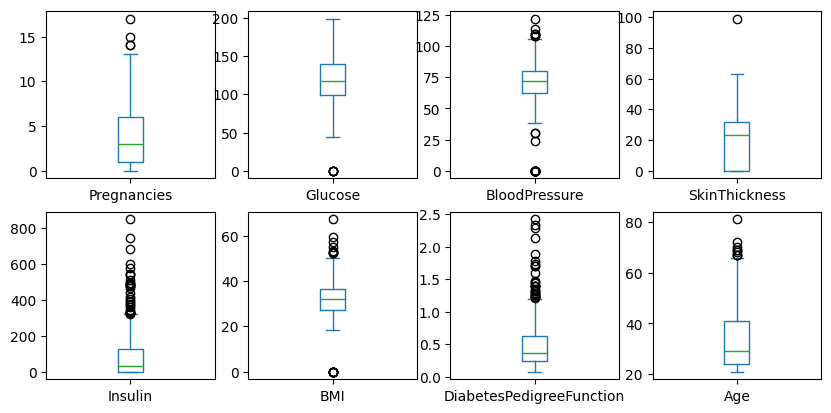

In [87]:
diabetes_data = diabetes.drop(["Outcome"], axis=1)
diabetes_data.plot(kind="box", subplots=True, layout=(4,4), figsize=(10,10))

Com os boxplots, se torna mais evidente a presença de outliers nos nossos dados. Assim será realizada a remoção destes

In [88]:
# Remove outliers

Q1 = diabetes.quantile(0.25)
Q3 = diabetes.quantile(0.75)
IQR = Q3 - Q1

diabetes = diabetes[~((diabetes < (Q1 - 1.5 * IQR)) |(diabetes > (Q3 + 1.5 * IQR))).any(axis=1)]

Pregnancies                    AxesSubplot(0.125,0.712609;0.168478x0.167391)
Glucose                     AxesSubplot(0.327174,0.712609;0.168478x0.167391)
BloodPressure               AxesSubplot(0.529348,0.712609;0.168478x0.167391)
SkinThickness               AxesSubplot(0.731522,0.712609;0.168478x0.167391)
Insulin                        AxesSubplot(0.125,0.511739;0.168478x0.167391)
BMI                         AxesSubplot(0.327174,0.511739;0.168478x0.167391)
DiabetesPedigreeFunction    AxesSubplot(0.529348,0.511739;0.168478x0.167391)
Age                         AxesSubplot(0.731522,0.511739;0.168478x0.167391)
dtype: object

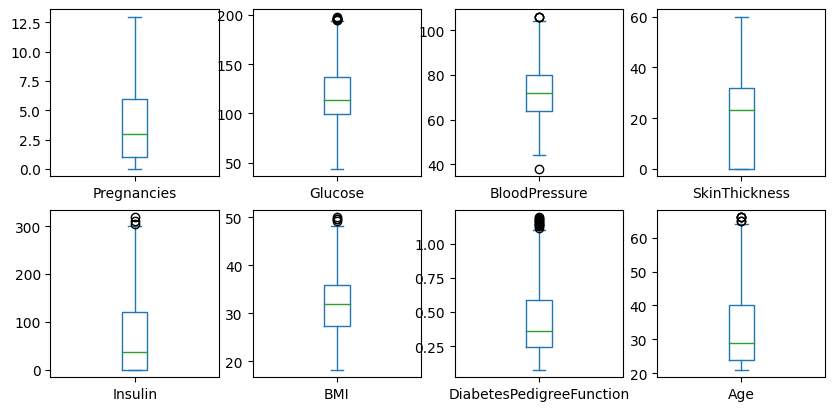

In [89]:
diabetes_data = diabetes.drop(["Outcome"], axis=1)
diabetes_data.plot(kind="box", subplots=True, layout=(4,4), figsize=(10,10))

In [90]:
# Substituição dos valores zerados por NaN

diabetes_copy = diabetes.copy(deep = True)
diabetes_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

print(diabetes_copy.isnull().sum())

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               179
Insulin                     307
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [91]:
# Limpando os dados dos valores NaN
diabetes_copy['Glucose'].fillna(diabetes_copy['Glucose'].mean(), inplace = True)
diabetes_copy['BloodPressure'].fillna(diabetes_copy['BloodPressure'].mean(), inplace = True)
diabetes_copy['SkinThickness'].fillna(diabetes_copy['SkinThickness'].median(), inplace = True)
diabetes_copy['Insulin'].fillna(diabetes_copy['Insulin'].median(), inplace = True)
diabetes_copy['BMI'].fillna(diabetes_copy['BMI'].median(), inplace = True)

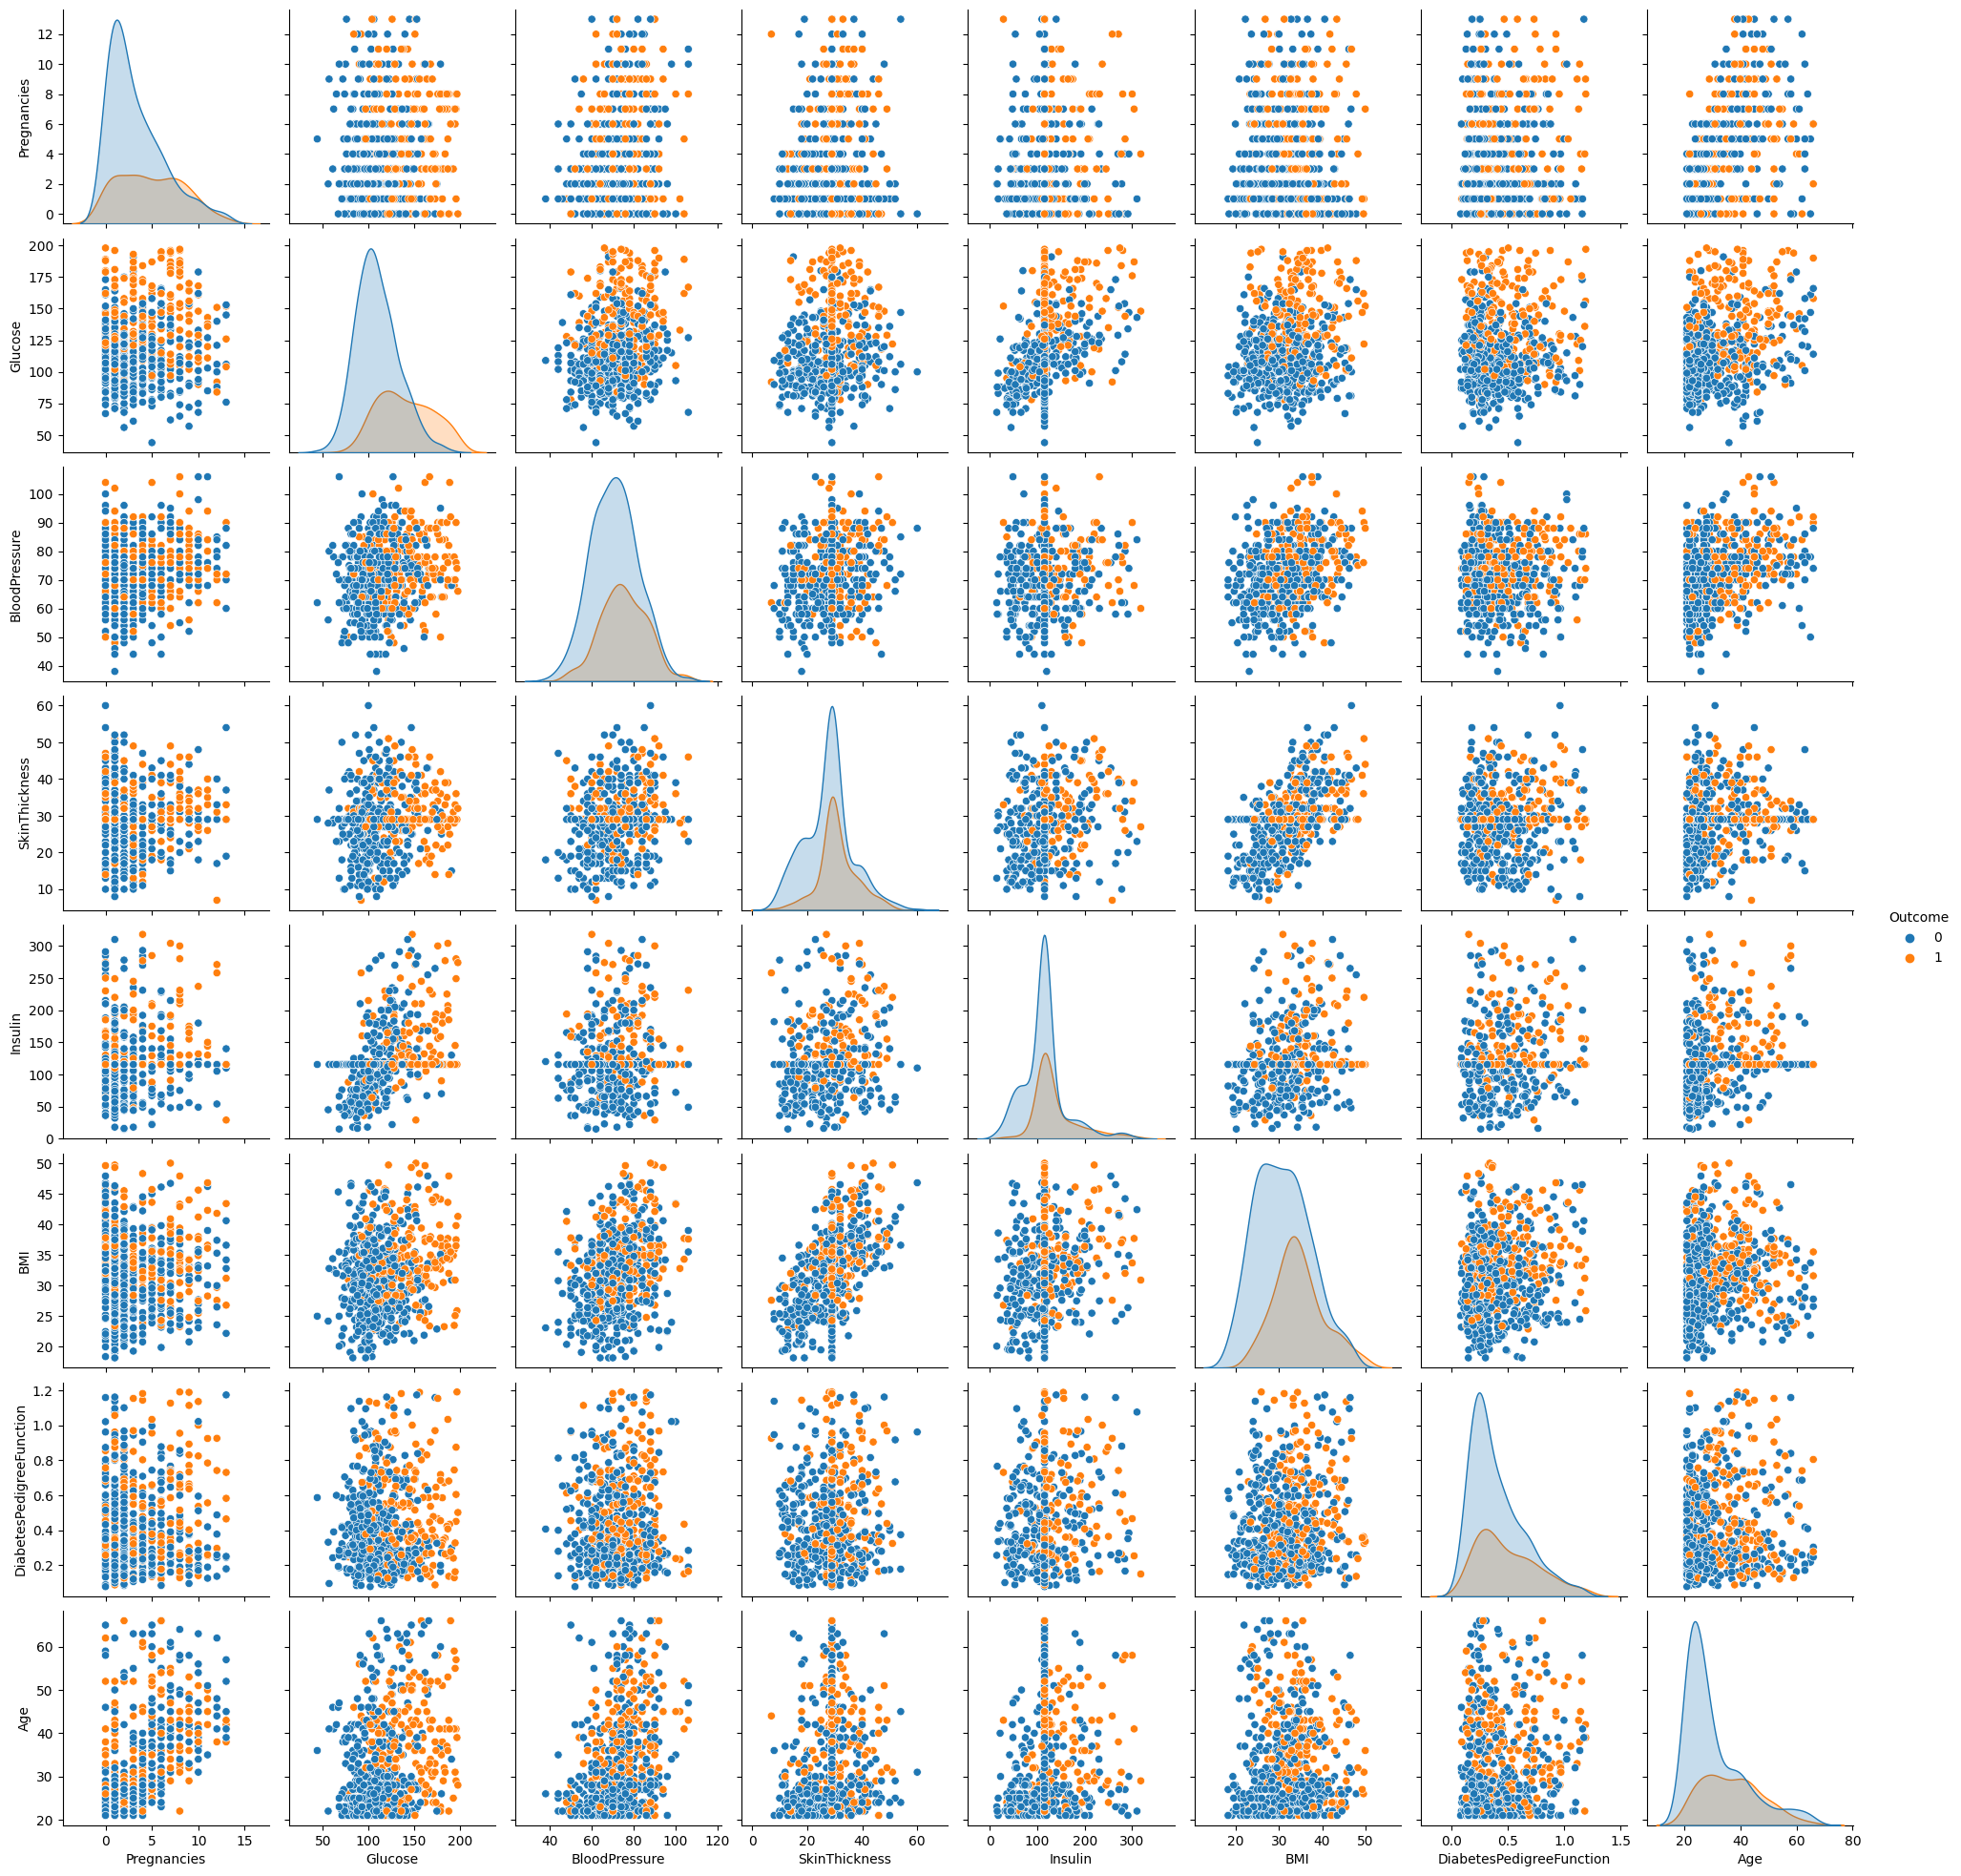

In [92]:
# Scatter plot dos dados

p=sb.pairplot(diabetes_copy, hue = 'Outcome')

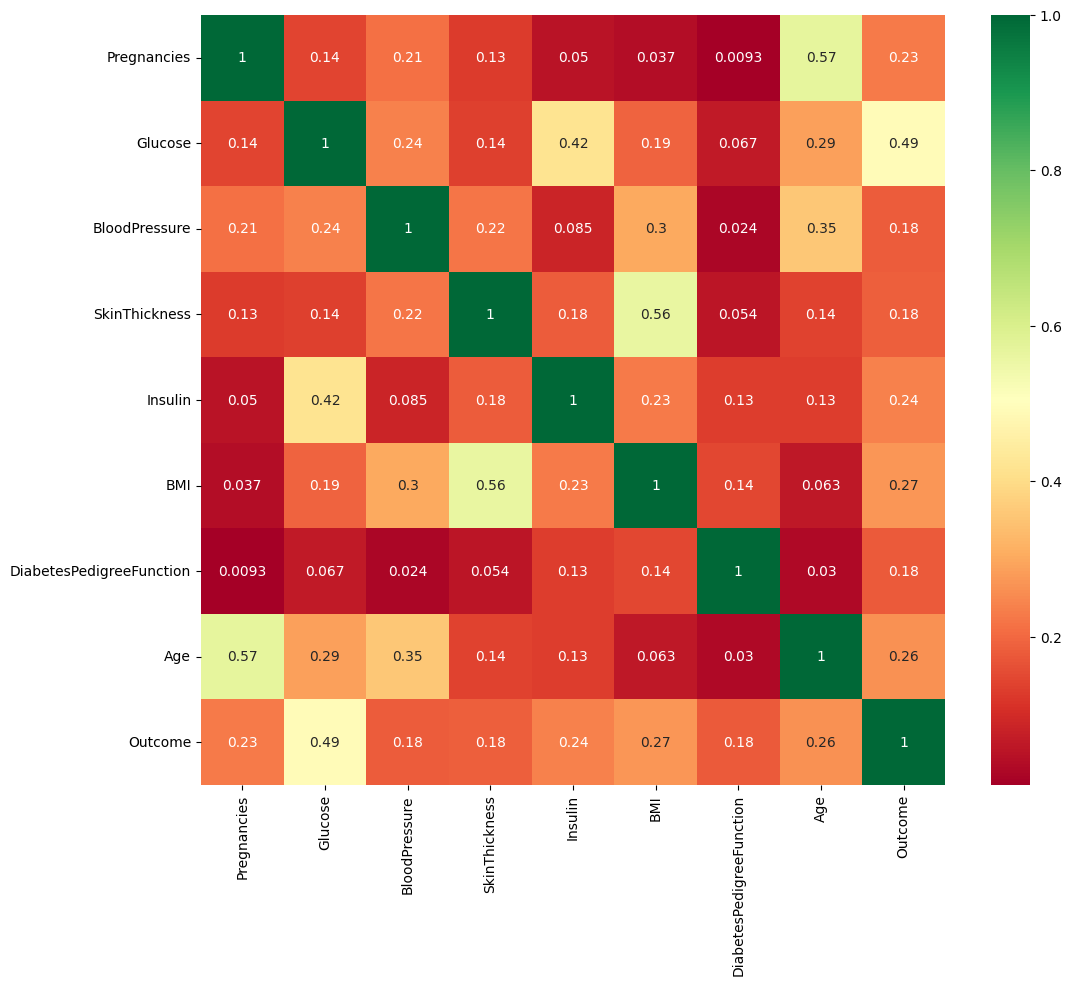

In [93]:
# Mapa de calor dos dados limpos

plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sb.heatmap(diabetes_copy.corr(), annot=True,cmap ='RdYlGn')

In [94]:
# Normalizando os dados. A normalização será especialmente útil para o algoritmo KNN.

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X = pd.DataFrame(sc.fit_transform(diabetes_copy.drop(['Outcome'], axis=1)), columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

y = diabetes_copy.Outcome

## Decision Tree
Depois de termos feito a exploração e a preparação dos dados, iremos realizar o primeiro teste de classificação utilizando o algoritmo Decision Tree

In [95]:
# Separa os dados com o método de Hold-Out
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/4,random_state=42, stratify=y)

In [96]:
# Testa vários níveis de profundidade da árvore
from sklearn.tree import DecisionTreeClassifier

test_scores = []
train_scores = []

for i in range(1,15):
    # utilizando 'weights' como 'universal' retornou melhores resultados
    dt = DecisionTreeClassifier(max_depth=i, criterion='entropy')
    dt.fit(X_train,y_train)
    
    train_scores.append(dt.score(X_train,y_train))
    test_scores.append(dt.score(X_test,y_test))

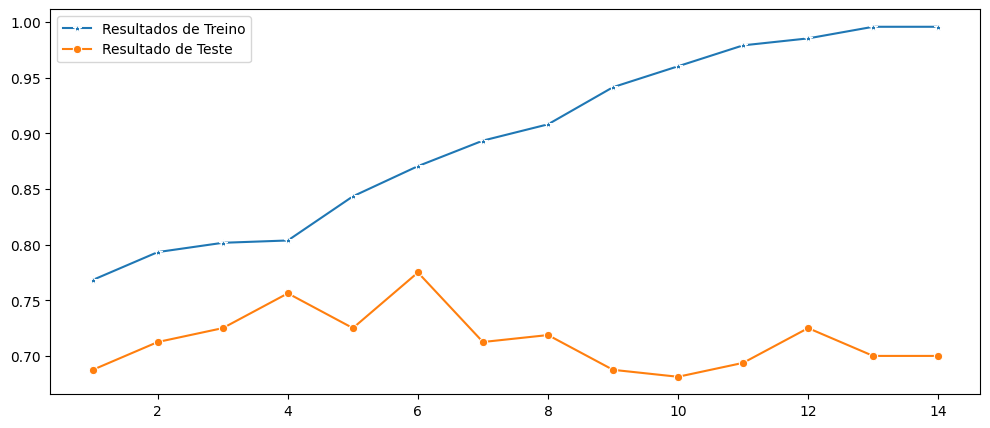

In [97]:
plt.figure(figsize=(12,5))
p = sb.lineplot(range(1,15),train_scores,marker='*',label='Resultados de Treino')
p = sb.lineplot(range(1,15),test_scores,marker='o',label='Resultado de Teste')

In [98]:
# Extraindo o melhor resultado obtido

max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Máximo score alcançado de {:.2f}% com profundidade = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Máximo score alcançado de 77.50% com profundidade = [6]


O melhor resultado foi obtido com uma profundidade de 4 níveis, portanto o teste será realizado com este valor

In [99]:
dt = DecisionTreeClassifier(max_depth=4, criterion='entropy', random_state=42)
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

predictions_test = dt.predict(X_test)

<AxesSubplot:>

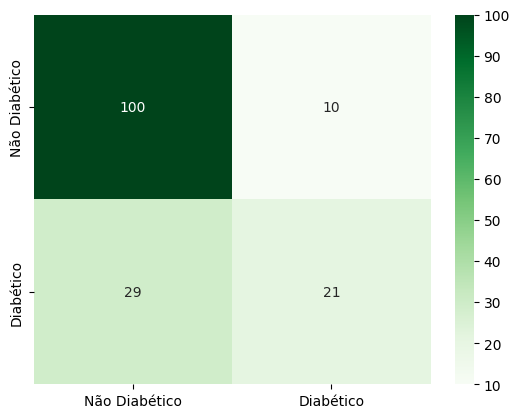

In [100]:
# Imprime matriz de confusão 
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predictions_test)

cf = confusion_matrix(y_test, predictions_test)
lbl = ['Não Diabético', 'Diabético']
sb.heatmap(cf,annot=True,cmap="Greens", fmt="d",xticklabels=lbl,yticklabels=lbl)

A curva ROC (Receiver Operating Characteristic) irá nos permitir visualizar o quão "bom" é nosso modelo em predizer se uma pessoa possui diabetes ou não.

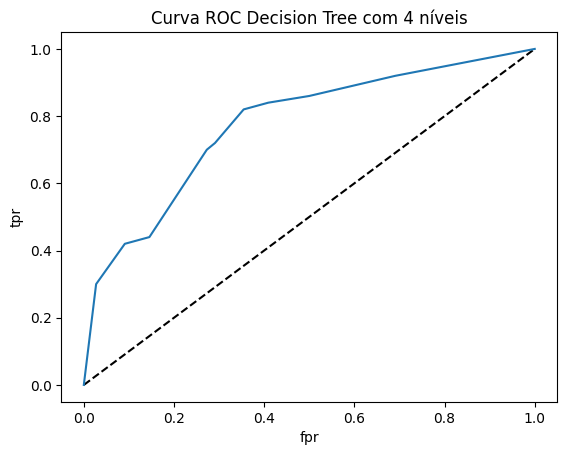

0.774090909090909

In [101]:
from sklearn.metrics import roc_curve
y_pred_proba = dt.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Decision Tree')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Curva ROC Decision Tree com 4 níveis')
plt.show()

# Área sob a curva

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

## K-Nearest Neighbour

In [104]:
from sklearn.neighbors import KNeighborsClassifier

In [102]:
# Separa os dados com o método de Hold-Out
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/4,random_state=42, stratify=y)

In [105]:
# Enconta o melhor vizinho

test_scores = []
train_scores = []

for i in range(1,15):
    # utilizando 'weights' como 'universal' retornou melhores resultados
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

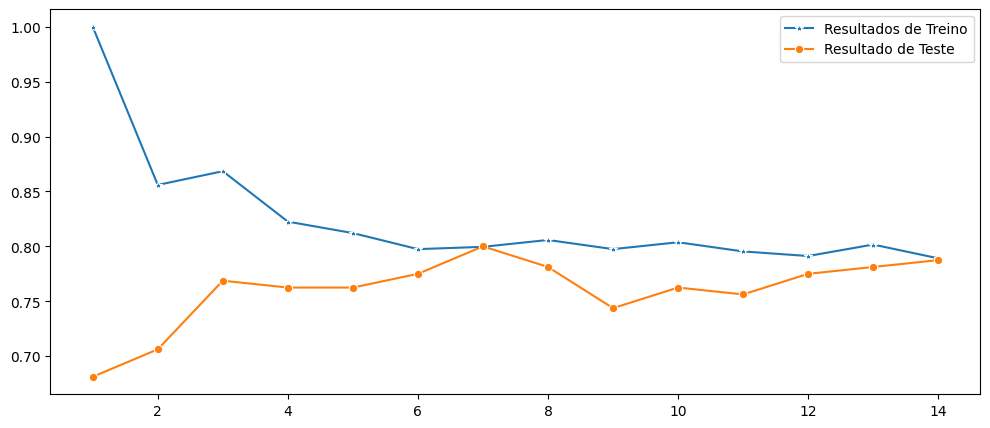

In [107]:
# Visualizando os scores

plt.figure(figsize=(12,5))
p = sb.lineplot(range(1,15),train_scores,marker='*',label='Resultados de Treino')
p = sb.lineplot(range(1,15),test_scores,marker='o',label='Resultado de Teste')

In [112]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
best_neighbours = list(map(lambda x: x+1, test_scores_ind))
best_neighbour = best_neighbours[0]
print('Máxima acurácia alcançada de {:.2f}% com k = {}'.format(max_test_score*100, best_neighbour))

Máxima acurácia alcançada de 80.00% com k = 7


In [118]:
knn = KNeighborsClassifier(best_neighbour)

knn.fit(X_train,y_train)
knn_score = knn.score(X_test,y_test)
print("Acurácia de {:.2f}%".format(knn_score*100))

predictions_test = knn.predict(X_test)

Acurácia de 80.00%


<AxesSubplot:>

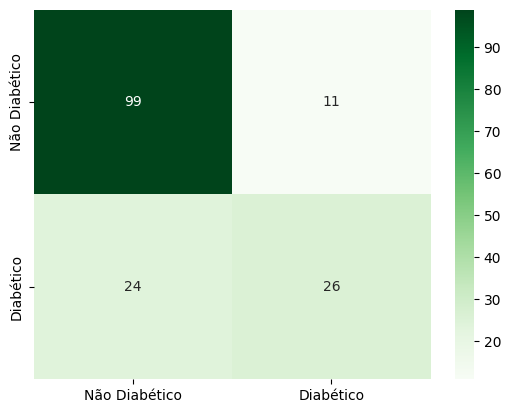

In [117]:
#Gera a matriz de confusão do treino
confusion_matrix(y_test, predictions_test)

cf = confusion_matrix(y_test, predictions_test)
lbl = ['Não Diabético', 'Diabético']
sb.heatmap(cf,annot=True,cmap="Greens", fmt="d",xticklabels=lbl,yticklabels=lbl)

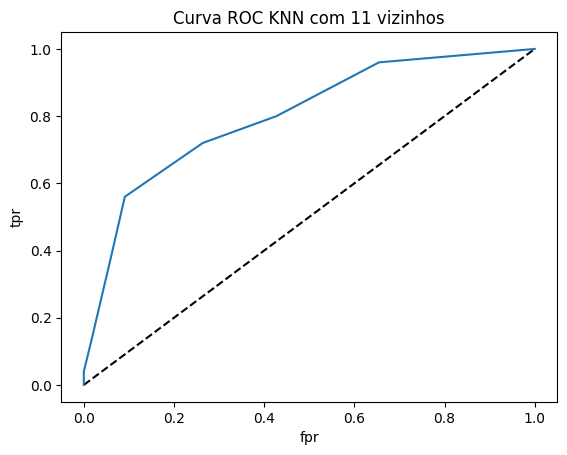

In [120]:
# Curva ROC

from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Curva ROC KNN com 11 vizinhos')
plt.show()

In [121]:
# Área sob a curva

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8004545454545454